In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [34]:
df_bcom_raw = pd.read_excel('BCOM Index (OHLC).xlsx', skiprows=[0,1,2,3,4,5], parse_dates=['Date'], index_col=0)


In [35]:
df_bcom_raw.head()

,PX_LAST,Change,% Change,PX_OPEN,Change.1,% Change.1,PX_HIGH,Change.2,% Change.2,PX_LOW,Change.3,% Change.3
Date,,,,,,,,,,,,
2019-02-25,81.3010,-0.8236,-1.002866,82.2414,0.1168,0.142223,82.4778,0.3532,0.430078,81.1855,-0.9391,-1.143506
2019-02-22,82.1246,0.3368,0.411797,81.7159,-0.0719,-0.087910,82.2338,0.4460,0.545314,81.6920,-0.0958,-0.117132
2019-02-21,81.7878,0.1057,0.129404,81.5986,-0.0835,-0.102226,81.8750,0.1929,0.236159,81.5439,-0.1382,-0.169193
2019-02-20,81.6821,0.3879,0.477156,81.4641,0.1699,0.208994,81.8110,0.5168,0.635716,81.0860,-0.2082,-0.256107
2019-02-19,81.2942,0.3373,0.416641,81.1193,0.1624,0.200601,81.3327,0.3758,0.464198,80.9724,0.0155,0.019146


In [55]:
df_spx_raw = pd.read_excel('SPX Index (OHLC).xlsx', skiprows=[0,1,2,3,4,5], parse_dates=['Date'], index_col=0)
len(df_spx_raw)

4816

In [57]:
df_spx_raw.tail()

,PX_LAST,Change,% Change,PX_OPEN,Change.1,% Change.1,PX_HIGH,Change.2,% Change.2,PX_LOW,Change.3,% Change.3
Date,,,,,,,,,,,,
2000-01-07,1441.47,NaN,NaN,1403.45,NaN,NaN,1441.47,NaN,NaN,1400.73,NaN,NaN
2000-01-06,1403.45,NaN,NaN,1402.11,NaN,NaN,1411.90,NaN,NaN,1392.02,NaN,NaN
2000-01-05,1402.11,NaN,NaN,1399.42,NaN,NaN,1413.27,NaN,NaN,1377.68,NaN,NaN
2000-01-04,1399.42,NaN,NaN,1455.22,NaN,NaN,1455.22,NaN,NaN,1397.43,NaN,NaN
2000-01-03,1455.22,NaN,NaN,1469.25,NaN,NaN,1478.00,NaN,NaN,1438.36,NaN,NaN


In [54]:
df_bcom_close = df_bcom_raw.PX_LAST
len(df_bcom_raw)

4806

In [53]:
df_bcom_close.tail()

Date
2000-01-07    90.7495
2000-01-06    91.0400
2000-01-05    91.0023
2000-01-04    91.4952
2000-01-03    92.0451
Name: PX_LAST, dtype: float64

In [42]:
df_spx_close = df_spx_raw.PX_LAST

In [51]:
df_spx_close.tail()

Date
2000-01-07    1441.47
2000-01-06    1403.45
2000-01-05    1402.11
2000-01-04    1399.42
2000-01-03    1455.22
Name: PX_LAST, dtype: float64

In [99]:
close_df = pd.DataFrame({'spx_close':df_spx_close, 'bcom_close':df_bcom_close})
close_df.dropna(inplace=True)
len(close_df)

4803

Text(0, 0.5, 'spx_close')

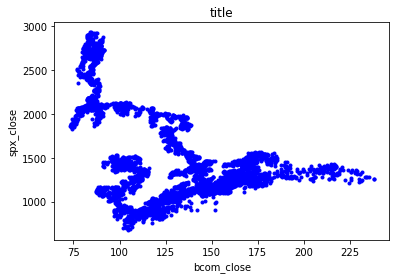

In [100]:
plot(close_df.bcom_close, close_df.spx_close, 'b.')
plt.title('title')
plt.xlabel("bcom_close")
plt.ylabel("spx_close")

In [101]:
x = close_df.bcom_close
y = close_df.spx_close
X = np.ones((x.size, 2))
X[:,1] = x

In [103]:
# X*beta = Y, we want to solve beta, but it do not have solution, therefore, we solve the close beta ,called beta_Hat
# X.T * X * beta_Hat = X.T * Y
# therefore beta_Hat = (X.T * X)^-1 * X.T * Y
# plug beta_Hat in X * beta = Y at beta position, beta_Hat is a close beta
# we get :
# X * beta_Hat = Y_hat
# X * [(X.T * X)^-1 * X.T * Y] = Y_hat

beta_Hat = dot(dot(inv(dot(X.T, X)) , X.T), y)
y_Hat = dot(X, beta_Hat)



Text(0, 0.5, 'spx_close')

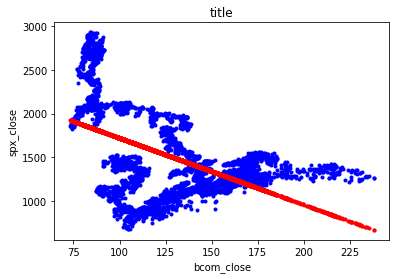

In [107]:

plot(x,y,'b.')
plot(x,y_Hat,'r.')
plt.title('title')
plt.xlabel("bcom_close")
plt.ylabel("spx_close")

In [127]:

def least_square(x,y,n):
    X = np.ones((x.size, n))
    for i in range(n):
        X[:,i] = x**i
    beta_Hat = dot(dot(inv(dot(X.T, X)) , X.T), y)
    
    y_Hat = dot(X, beta_Hat)
    plot(x,y,'b.')
    plot(x,y_Hat,'r.')
    plt.title('title')
    plt.xlabel("bcom_close")
    plt.ylabel("spx_close")


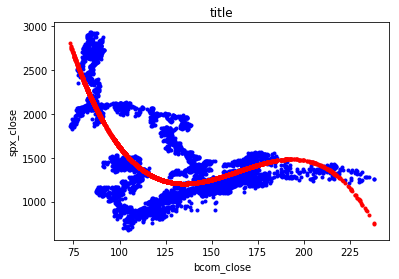

In [128]:
x = close_df.bcom_close
y = close_df.spx_close
least_square(x,y,4)

In [165]:
def predict(x,y,n):
    n= n+1
    for n in range(1,n):
        X = np.ones((x.size, n))
        for i in range(n):
            X[:,i] = x**i
        beta_Hat = dot(dot(inv(dot(X.T, X)) , X.T), y)

    #     y_Hat = dot(X, beta_Hat)
        xx = np.linspace(50,250,20000)
        XX = np.ones((xx.size, n))
        for i in range(n):
            XX[:,i] = xx**i
        yy_Hat = XX.dot(beta_Hat)

        plot(x,y,'b.')
        plot(xx,yy_Hat)
        plt.title('title')
        plt.xlabel("bcom_close")
        plt.ylabel("spx_close")


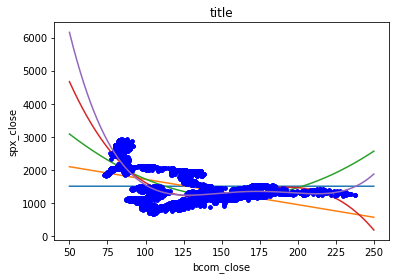

In [166]:
predict(x,y,5)